## Small open economy figures

Figures for the small open economy with a given world interest rate

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import uniform

In [2]:
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [3]:
from world_econ import Country

In [62]:
sme = Country(v1=1.5, z=5, q1=0.75, q0=0.5, alpha=.65)
r_star = 1.05

h = lambda w: sme.update_wage(w, r_star)
h2 = lambda w: h(h(w))

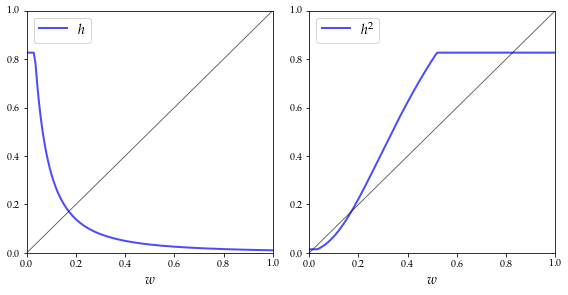

In [65]:
wgrid = np.linspace(0, 1, 140)

fig, axes = plt.subplots(1, 2, figsize=(8, 4.2))

ax = axes[0]
ax.plot(wgrid, [h(w) for w in wgrid], 'b-', lw=2, alpha=0.7, label="$h$")
ax.plot(wgrid, wgrid, 'k-', lw=0.8, alpha=0.7)

ax = axes[1]
ax.plot(wgrid, [h2(w) for w in wgrid], 'b-', lw=2, alpha=0.7, label="$h^2$")
ax.plot(wgrid, wgrid, 'k-', lw=0.8, alpha=0.7)


for ax in axes:
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel('$w$', fontsize=14)
    ax.legend(fontsize=14)

plt.savefig("foo.pdf")
plt.tight_layout()
plt.show()

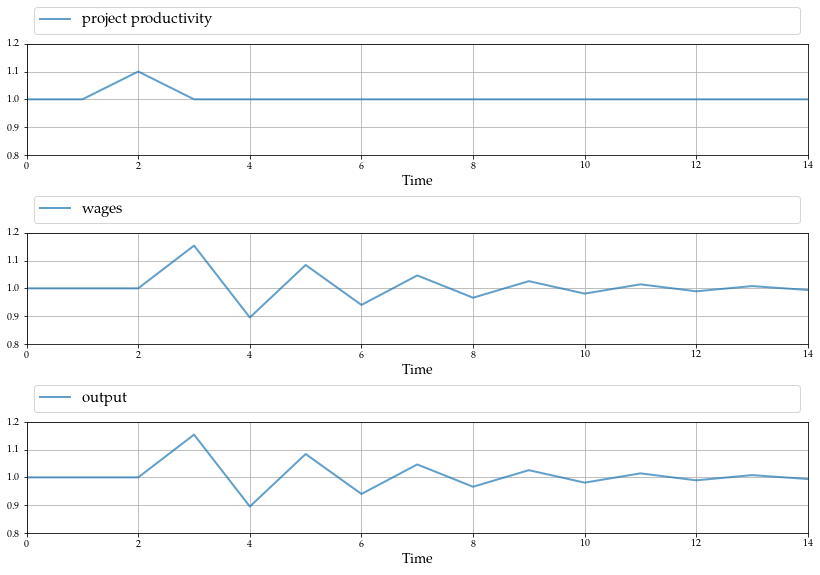

In [70]:
sme = Country(alpha=0.6)
rstar = 1.1
ts_length=15

n_rows = 3
fig, axes = plt.subplots(n_rows, 1, figsize=(14, 9))

bbox = (0., 1.02, 1., .102)
legend_args = {'bbox_to_anchor' : bbox, 'loc' : 3, 'mode' : 'expand', 'fontsize' : 15}
p_args = {'lw' : 2, 'alpha' : 0.7}

plt.subplots_adjust(hspace=0.7)
for i in range(n_rows):
    axes[i].grid()
    axes[i].set_xlabel(r'Time', fontsize=14)
    axes[i].set_ylim(0.8, 1.2)
    axes[i].set_xlim(0, ts_length-1)
    axes[i].set_yticks((0.8, 0.9, 1.0, 1.1, 1.2))


w_vec = []
k_vec = []
cap_vec = []
z_vec = []

w = 0.078
k = (w / (1 - sme.alpha))**(1/sme.alpha)
cap = w - sme.phi(w, rstar) 


# Simulate to smooth out 

for i in range(100):
    
    w_next = sme.update_wage(w, rstar)
    k_next = (w_next / (1 - sme.alpha))**(1/sme.alpha)
    cap_next = w - sme.phi(w, rstar)

    w = w_next
    k = k_next
    cap = cap_next


# Now shock and record

for i in range(ts_length):

    w_vec.append(w)
    k_vec.append(k)
    cap_vec.append(cap)

    if i == 2:
        sme.z = sme.z * 1.1
        sme.calibrate()
        
    if i == 3:
        sme.z = sme.z / 1.1
        sme.calibrate()

    z_vec.append(sme.z)
    w_next = sme.update_wage(w, rstar)
    k_next = (w_next / (1 - sme.alpha))**(1/sme.alpha)
    cap_next = w - sme.phi(w, rstar)

    w = w_next
    k = k_next
    cap = cap_next
    
w_vec = np.asarray(w_vec)
k_vec = np.asarray(k_vec)
z_vec = np.asarray(z_vec)

w_vec = w_vec / w_vec[0]
k_vec = k_vec / k_vec[0]
z_vec = z_vec / z_vec[0]

y_vec = k_vec**sme.alpha

idx = range(len(z_vec))

ax = axes[0]
ax.plot(idx, z_vec, label='project productivity', **p_args)
ax.legend(ncol=1, **legend_args)

ax = axes[1]
ax.plot(idx, w_vec, label='wages', **p_args)
ax.legend(ncol=1, **legend_args)

ax = axes[2]
ax.plot(idx, y_vec, label='output', **p_args)
ax.legend(ncol=1, **legend_args)

plt.savefig("foo.pdf")
plt.show()